# IBM HR Analytics Employee Attrition & Performance

### Introduction
* Briefly introduce the topic of HR analytics and its significance in modern organizations.
* Highlight the importance of understanding employee attrition and its impact on overall company performance.

### Problem Statement
* High employee attrition rates within the organization.
* Need to assess factors contributing to attrition.
* Investigate the impact of various attributes on employee performance.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import category_encoders


from category_encoders import LeaveOneOutEncoder
from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config

# algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# matrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# warning
import warnings
warnings.filterwarnings('ignore')

# Loading Datset

In [2]:
df = pd.read_csv(r"C:\Users\Manikanta\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

### STT Attribute Name Meaning

* 1	Age	- Employee's age
* 2	Gender -	Employee's Gender
* 3	BusinessTravel -	Frequency of employees' business trips
* 4	DailyRate -	Daily salary rate for employees
* 5	Department -	Office of employees
* 6	DistanceFromHome -	Distance from home in miles to work
* 7	Education -	Level of education achieved by staff
* 8	EducationField -	Employee's field of study
* 9	EmployeeCount -	Total number of employees in the organization
* 10	EmployeeNumber -	A unique identifier for each employee record
* 11	EnvironmentSatisfaction -	Employee satisfaction with their working environment
* 12	HourlyRate -	Hourly rate for employees
* 13	JobInvolvement -	Level of involvement required for the employee's job
* 14	JobLevel -	Employee's level of work
* 15	JobRole -	The role of employees in the organization
* 16	JobSatisfaction -	Employee satisfaction with their work
* 17	MaritalStatus -	Employee's marital status
* 18	MonthlyIncome -	Employee's monthly income
* 19	MonthlyRate -	Monthly salary rate for employees
* 20	NumCompaniesWorked -	Number of companies the employee worked for
* 21	Over18 -	Whether the employee is over 18 years old
* 22	OverTime -	Do employees work overtime
* 23	PercentSalaryHike -	Salary increase rate for employees
* 24	PerformanceRating -	The performance rating of the employee
* 25	RelationshipSatisfaction -	Employee satisfaction with their relationships
* 26	StandardHours -	Standard working hours for employees
* 27	StockOptionLevel -	Employee stock option level
* 28	TotalWorkingYears -	Total number of years the employee has worked
* 29	TrainingTimesLastYear  - Number of times employees were taken to training in the last year
* 30	WorkLifeBalance  -	Employees' perception of their work-life balance
* 31	YearsAtCompany - Number of years employees have been with the company
* 32	YearsInCurrentRole  -	Number of years the employee has been in their current role
* 33	YearsSinceLastPromotion  -	Number of years since employee's last promotion
* 34	YearsWithCurrManager -	Number of years an employee has been with their current manager
* 35	Attrition -	Does the employee leave the organization

# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

### Numeric and Categorical Columns

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
df[numeric_cols]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


* 1. There are only 26 columns Numerical Attributes in the dataset.
* 2. On the other hand we have 9 columns Categorical Attributes.

In [9]:
# Descriptive Analysis on Numerical Attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- Count: It shows the number of values that are not missing in each of the column.
- Mean : It shows the average of the values in each of the column.
- Std : It shows standard deviation of the values in each of the column.
- Min : It shows the smallest value in each of the column.
- Max : It shows the maximum value in each of the column.
- 25%, 50%, 75%: The valuescorrespond to the data divisions of 25%, 50% and 75% percentiles.

1. The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
2. The Stanard Deviation value of EmployeeCount and StandardHours is 0.00 which conveys that All values present in this attribute are same.
3. Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
4. Since this Attribute will not provide any meaningful insights in our analysis we can simply drop these attributes.

In [10]:
#Descriptive Analysis on Categorical Attributes
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


- Count: It shows the number of values that are not missing in each of the column.
- Unique : It shows the number of unique values present in each of the ccolumn.
- Top : It shows which categorical value is present most in each of the column.
- Freq : It shows the frequency of the categorical value apperaing most in each of the columns.

#### Number of unique values per column

In [11]:
Nunique = df.nunique()
Nunique = Nunique.sort_values()
Nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

# Data-Visualization

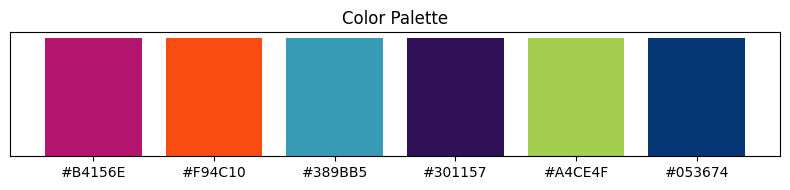

In [12]:
# Guptha Company colors palette
color_palette = ['#B4156E', '#F94C10', '#389BB5','#301157', '#A4CE4F','#053674']

# Create a bar plot to display the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(color_palette):
    plt.bar(i, height=1, color=color)

plt.xticks(range(len(color_palette)), color_palette, rotation=45)
plt.yticks([]) 
plt.title("Color Palette")
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

<Axes: >

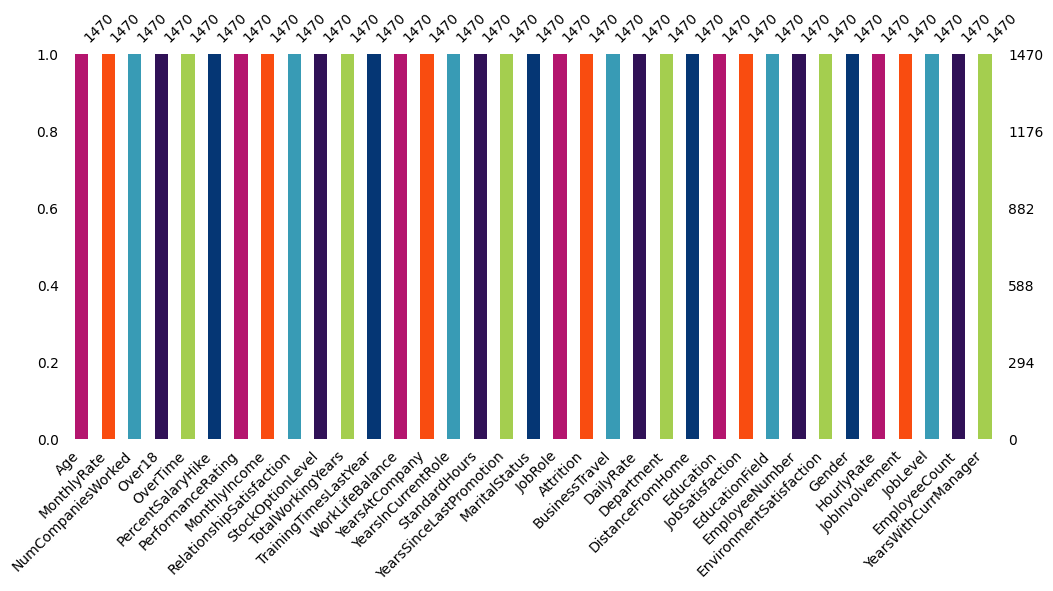

In [13]:
msno.bar(df, color=color_palette, sort="ascending", figsize=(12,5), fontsize=10)

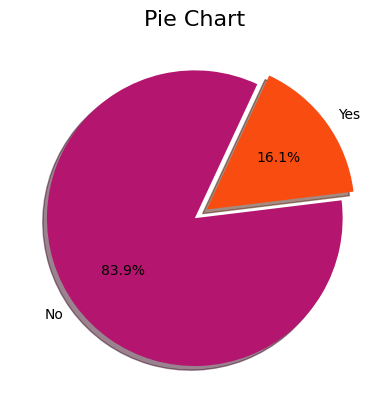

In [14]:
# Target column 

churn_counts = df['Attrition'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index,shadow=True, autopct='%1.1f%%',
        startangle=65, colors=color_palette, explode=(0, 0.1))
plt.title("Pie Chart", fontsize=16)
plt.show()

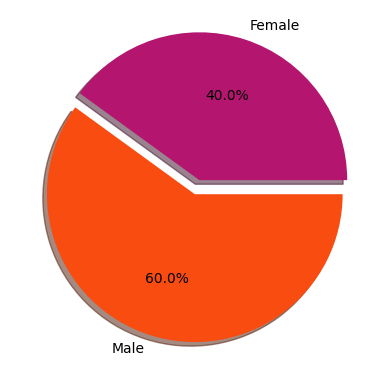

In [15]:
# How many males and females in this job?

group_by_diag = df.groupby("Gender").count().reset_index()
sizes = group_by_diag['EmployeeNumber']
labels = group_by_diag['Gender']

plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors = color_palette , explode=[0.1,0], shadow=True)
plt.show()

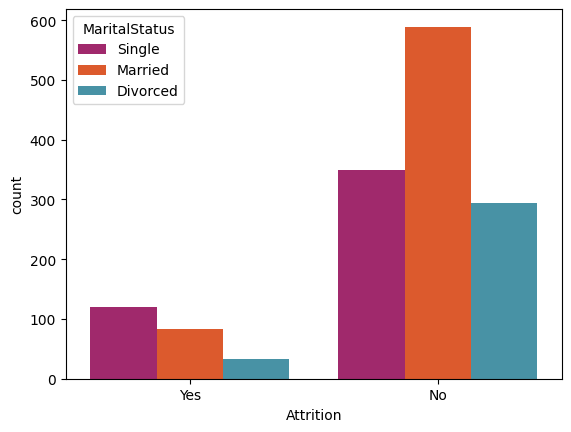

In [16]:
# Relationship between marital status and attrition

sns.countplot(x='Attrition', hue='MaritalStatus', data=df, palette=color_palette)
plt.show()


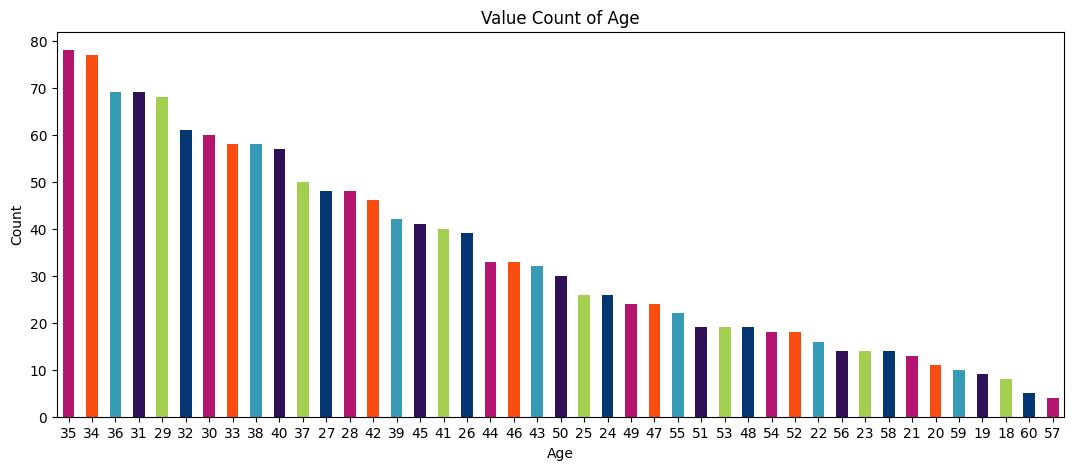

In [17]:
# most common age?

plt.figure(figsize=(13, 5))
df.Age.value_counts().plot(kind="bar", color=color_palette)
plt.title("Value Count of Age")
plt.xlabel("Age")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

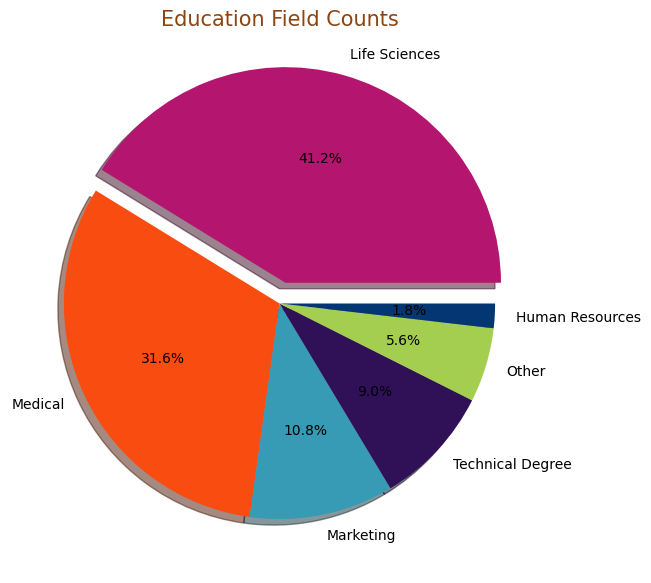

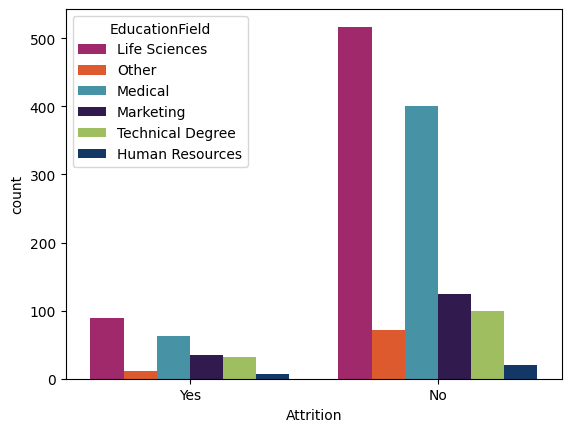

In [18]:
# employees by the education field

labels = df['EducationField'].value_counts().index
sizes = df['EducationField'].value_counts().values

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=color_palette, autopct="%1.1f%%", explode=[0.1, 0, 0, 0, 0, 0], shadow=True)
plt.title("Education Field Counts", color="saddlebrown", fontsize=15)

plt.show()


# The majority of employee are life science educated.

sns.set_palette(color_palette)
sns.countplot(x='Attrition', hue='EducationField', data=df)
plt.show()

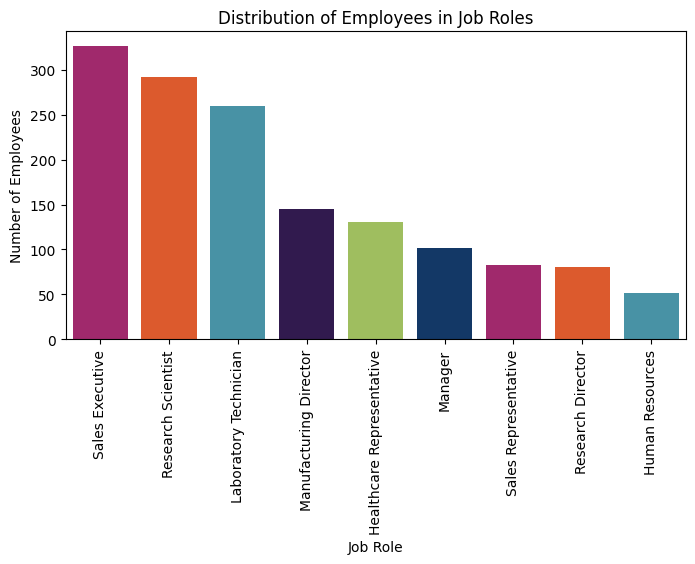

In [19]:
# Count the number of employees in each job role
job_role_counts = df['JobRole'].value_counts()

# Create a bar chart using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=job_role_counts.index, y=job_role_counts.values, palette=color_palette)
plt.title('Distribution of Employees in Job Roles')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.show()


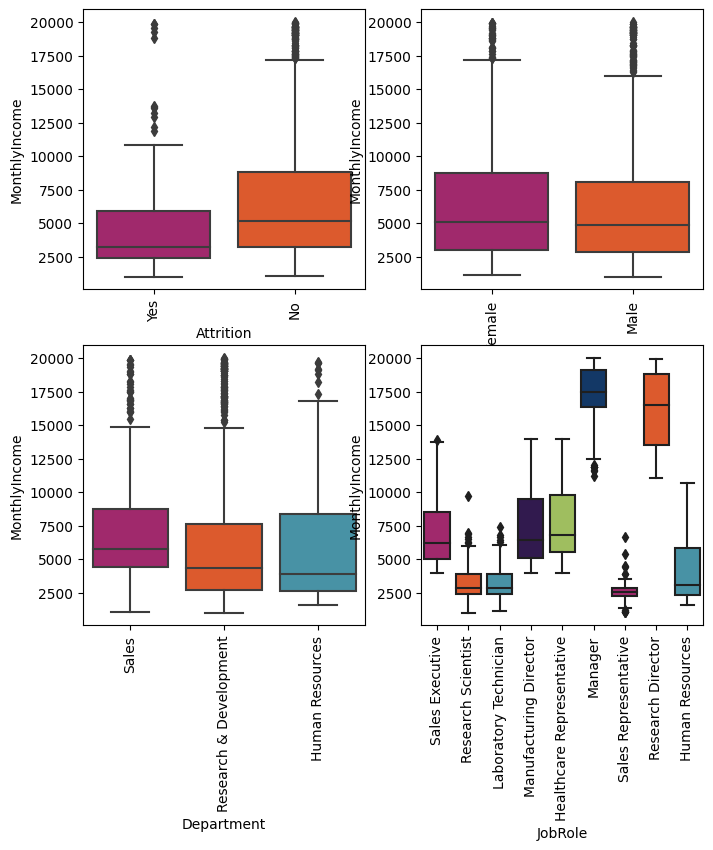

In [20]:
# Box plots

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Boxplot for Attrition vs MonthlyIncome with custom palette
plt.sca(ax[0, 0])
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette = color_palette)
plt.xticks(rotation=90)

# Boxplot for Gender vs MonthlyIncome with custom palette
plt.sca(ax[0, 1])
sns.boxplot(data=df, x='Gender', y='MonthlyIncome', palette = color_palette)
plt.xticks(rotation=90)

# Boxplot for Department vs MonthlyIncome with custom palette
plt.sca(ax[1, 0])
sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette = color_palette)
plt.xticks(rotation=90)

# Boxplot for JobRole vs MonthlyIncome with custom palette
plt.sca(ax[1, 1])
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', palette = color_palette)
plt.xticks(rotation=90)

plt.show()

<Axes: >

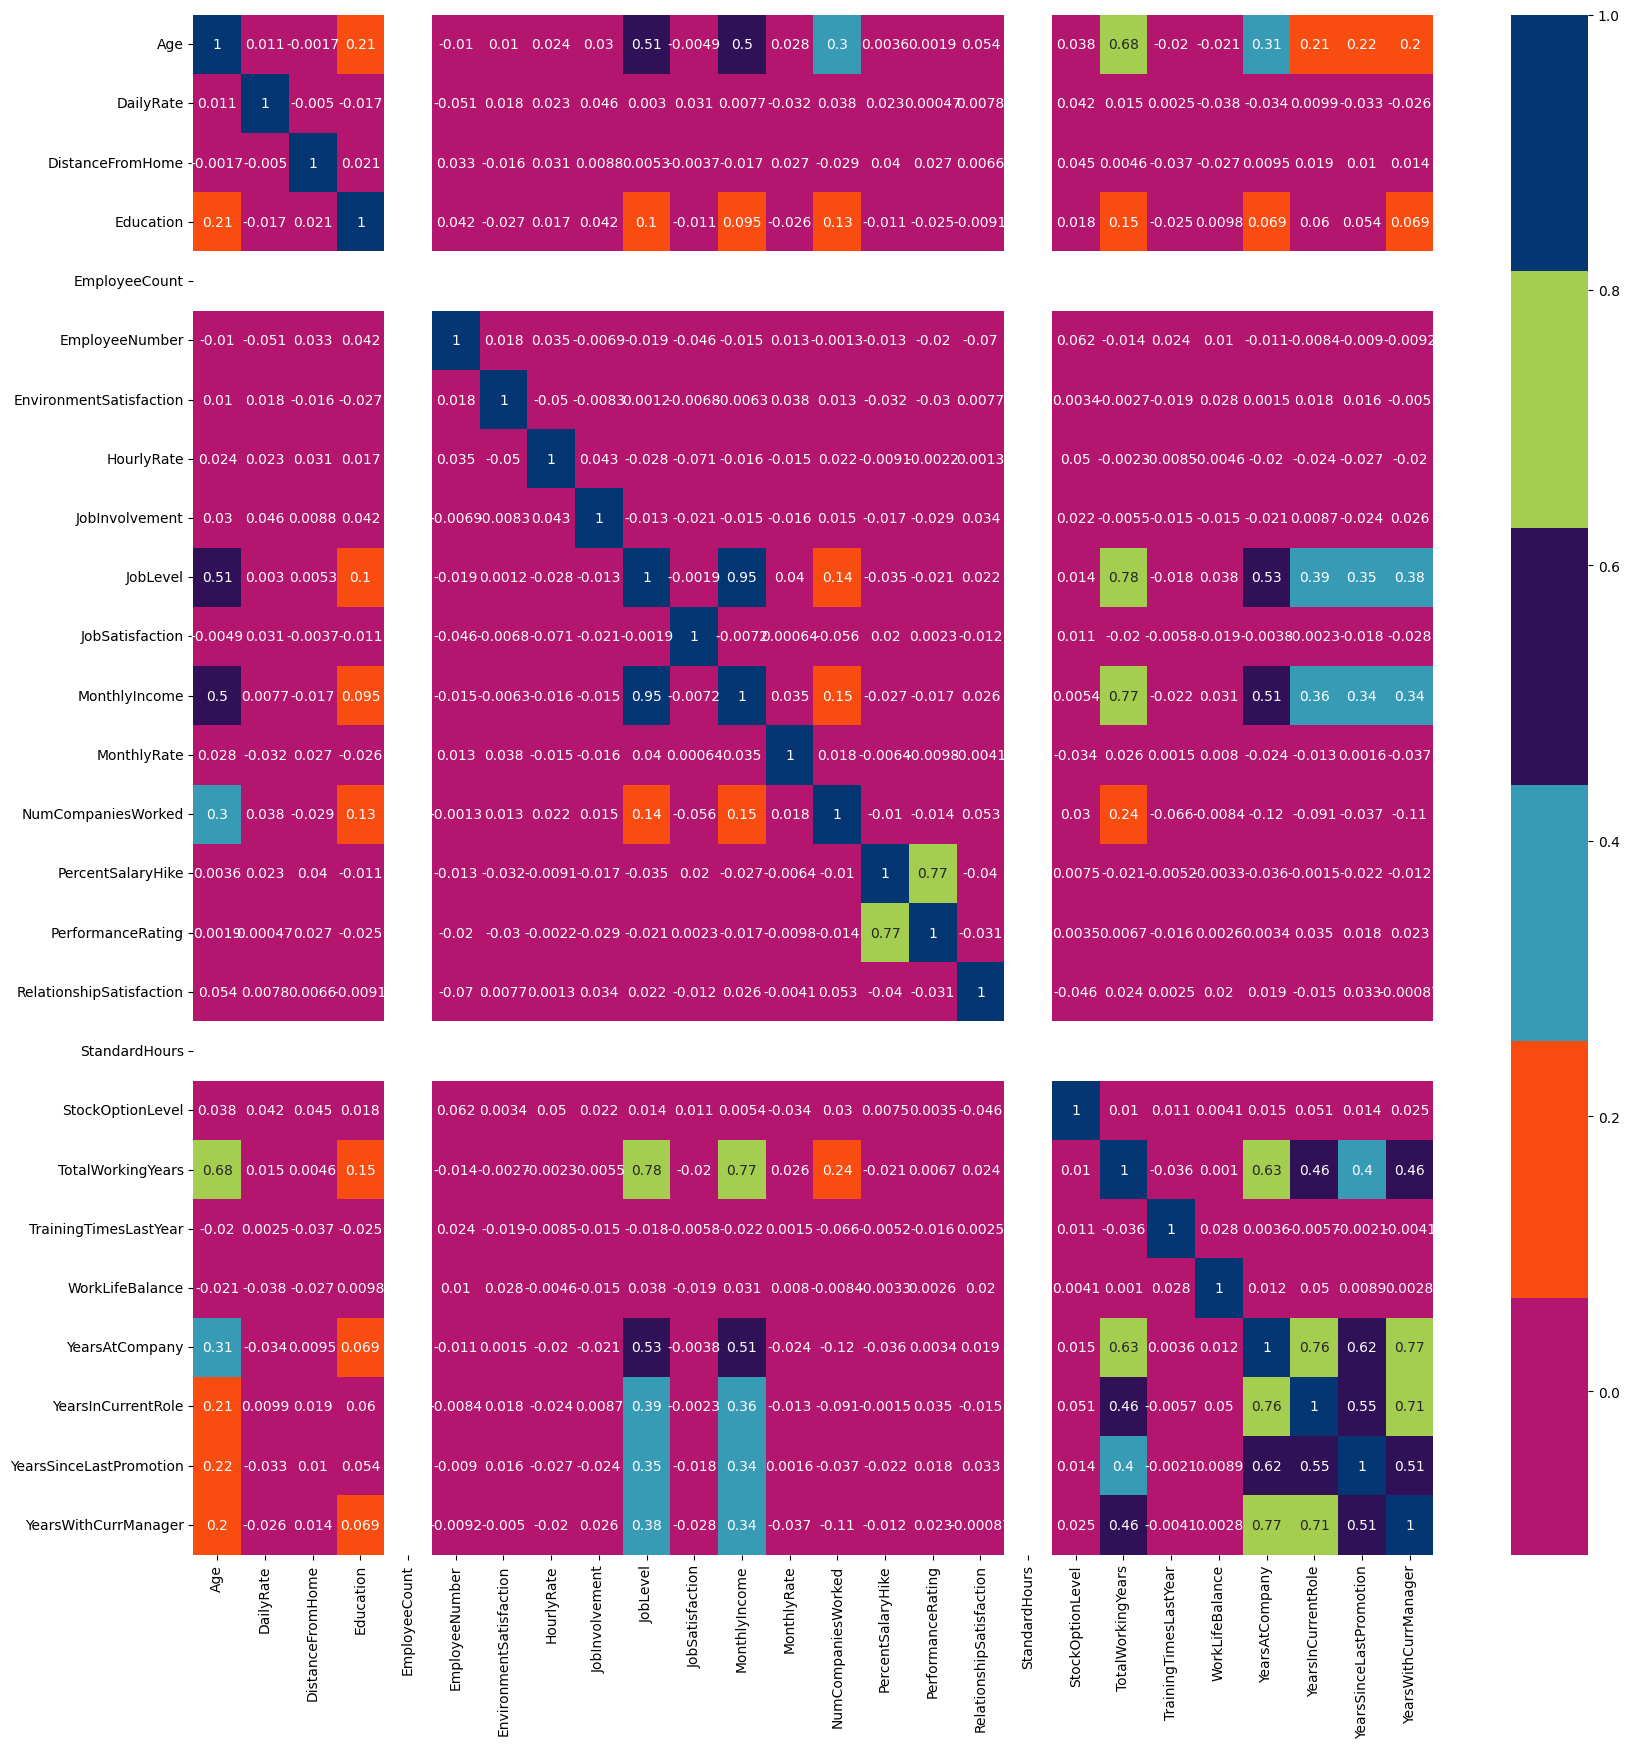

In [21]:
# A heatmap for all the columns values

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap=color_palette)

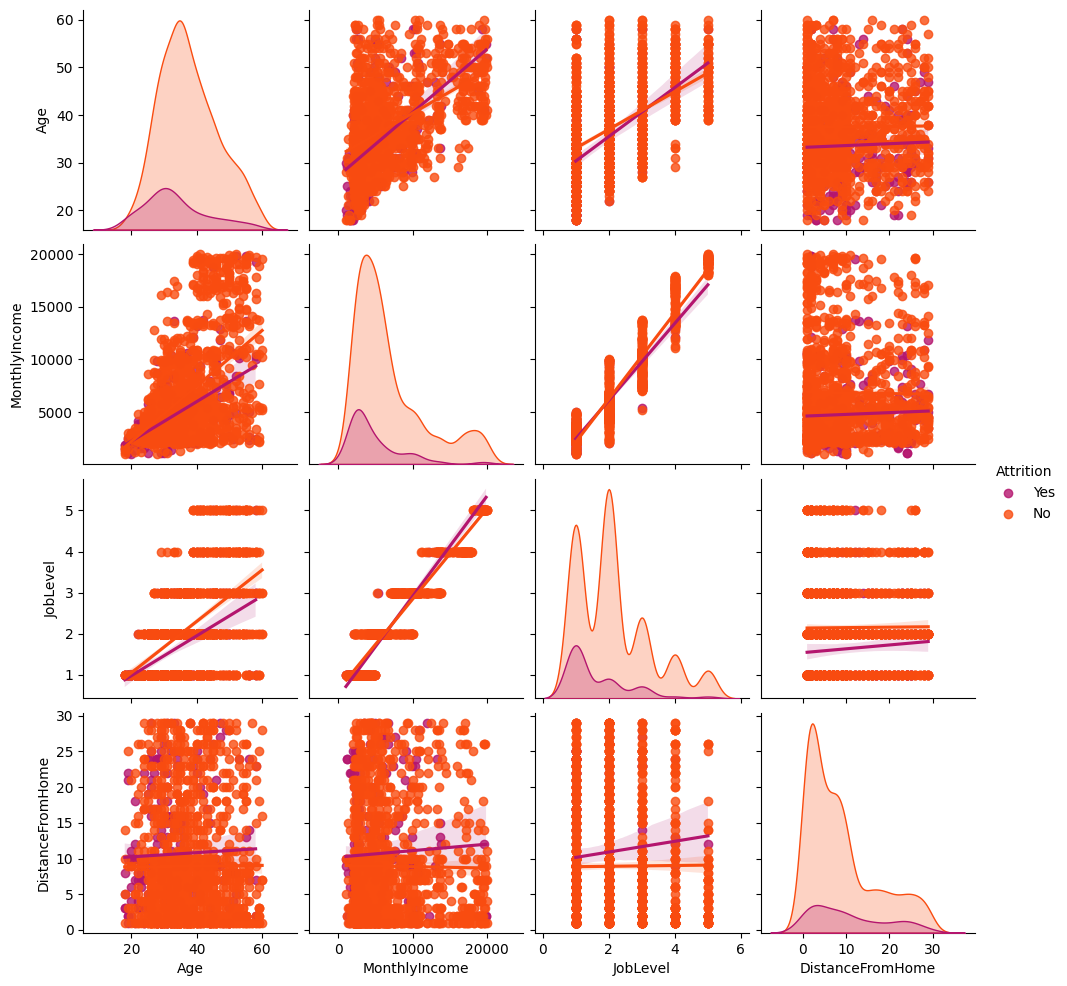

In [22]:
# Pair Plot relationships in a dataset.

cont_col = ['Attrition', 'Age', 'MonthlyIncome', 'JobLevel', 'DistanceFromHome']
sns.pairplot(df[cont_col], kind="reg", diag_kind="kde", hue='Attrition', palette=color_palette)
plt.show()


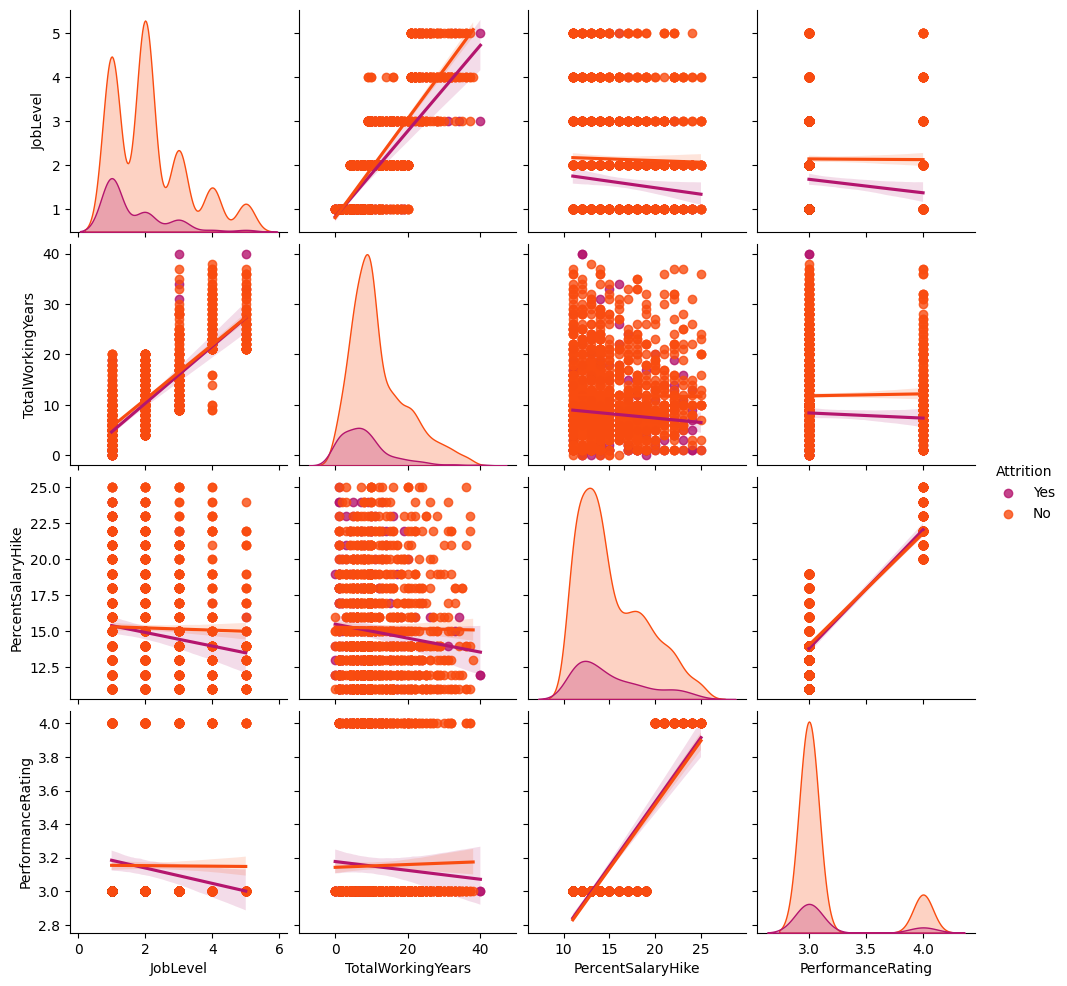

In [23]:
# Pair Plot relationships in a dataset

cont_col= ['Attrition','JobLevel','TotalWorkingYears', 'PercentSalaryHike','PerformanceRating']
sns.pairplot(df[cont_col], kind="reg", diag_kind = "kde" , hue = 'Attrition', palette=color_palette)
plt.show()

# Data PreProcessing

* **Converting Catagorical Columns Into Numerical By OnehotEncoding**
* **Converting Numerical Columns All Into A One Scale By Using MinMax, Standadization, RobustScale**

In [24]:
df.shape

(1470, 35)

### Spliting The Data Into Train And Test

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

In [27]:
print(f'X_train_shape : {X_train.shape}\n'
      f'X_test_shape  : {X_test.shape}\n'
      f'Y_train_len   : {Y_train.shape}\n'
      f'Y_test_len    : {Y_test.shape}')

X_train_shape : (1029, 34)
X_test_shape  : (441, 34)
Y_train_len   : (1029,)
Y_test_len    : (441,)


In [28]:
catagirical_col = list(X_train.select_dtypes(include=['object']))
numerical_col = list(X_train.select_dtypes(exclude=['object']))

In [29]:
# labelEncoding for target column

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

### Creating A Pipeline Of Categorical Columns

In [30]:
catgorical_pipl_oe = Pipeline(steps = [
    
    ('oneHotEndoding' , OneHotEncoder(sparse_output = False , drop = 'first'))
])


catgorical_pipl_be = Pipeline(steps = [
    
    ('BinaryEncoder' , BinaryEncoder())
])


catgorical_pipl_te = Pipeline(steps = [
    
    ('TargetEncoder' , TargetEncoder())
])


catgorical_pipl_tle = Pipeline(steps = [
    
    ('LeaveOneOutEncoder' , LeaveOneOutEncoder())
])

### Creating A Pipeline Of Numerical Columns

In [31]:
# minMaxScaler
numerical_pipl_mm = Pipeline(steps = [
    
    ('MinMaxScaler'     , MinMaxScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])


# robustScaler
numerical_pipl_rs = Pipeline(steps = [
    
    ('RobustScaler'     , RobustScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])


# standardScaler
numerical_pipl_ss = Pipeline(steps = [
    
    ('StandardScaler'   , StandardScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])

## Column Transformer To Combine All The Pipeline To One Final Pipeline

### OneHotEncoder With Minmaxscaler, RobustScaler, Standardscaler

In [32]:
ohe_minmax = ColumnTransformer(transformers = [
    
    ('OneHotEncoder' , catgorical_pipl_oe   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')


ohe_robst = ColumnTransformer(transformers = [
    
    ('OneHotEncoder' , catgorical_pipl_oe   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')


ohe_stnd = ColumnTransformer(transformers = [
    
    ('OneHotEncoder' , catgorical_pipl_oe   , catagirical_col),
    ('StandardScalar'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

### Binary Encoder With Minmaxscaler, RobustScaler, Standardscaler

In [33]:
bi_minmax = ColumnTransformer(transformers = [
    
    ('BinaryEncoder' , catgorical_pipl_be   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')


bi_robst = ColumnTransformer(transformers = [
    
    ('BinaryEncoder' , catgorical_pipl_be   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')


bi_stnd = ColumnTransformer(transformers = [
    
    ('BinaryEncoder' , catgorical_pipl_be   , catagirical_col),
    ('StandardScaler'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

### Target Encoder With Minmaxscaler, RobustScaler, Standardscaler

In [34]:
te_minmax = ColumnTransformer(transformers = [
    
    ('TargerEncoder' , catgorical_pipl_te   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')


te_robst = ColumnTransformer(transformers = [
    
    ('TargerEncoder' , catgorical_pipl_te   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')


te_stnd = ColumnTransformer(transformers = [
    
    ('TargerEncoder' , catgorical_pipl_te   , catagirical_col),
    ('StandardScaler'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

### LeaveOneOut Encoder With Minmaxscaler, RobustScaler, Standardscaler

In [35]:
loe_minmax = ColumnTransformer(transformers = [
    
    ('LeaveOneOutEncoder' , catgorical_pipl_tle   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')


loe_robst = ColumnTransformer(transformers = [
    
    ('LeaveOneOutEncoder' , catgorical_pipl_tle   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')


loe_stnd = ColumnTransformer(transformers = [
    
    ('LeaveOneOutEncoder' , catgorical_pipl_tle   , catagirical_col),
    ('StandardScaler'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

# Data Modelling

In [36]:
select_preprocessing_step = np.random.choice(['ohe_minmax'])


#                  creating a pipeline
#***************************************************************#

#                 KNeighbors Classifier
#================================================================#
final_pipeline_knc = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('KNeighborsClassifier',KNeighborsClassifier())
])


#                  Logistic Regression
#================================================================#
final_pipeline_lr = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('LogisticRegression',LogisticRegression())
])


#                 Support Vector Classifier
#================================================================#
final_pipeline_svc = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('suppportVector',SVC())
])

#               Decision Tree Classifier
#================================================================#
final_pipeline_dt = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('DecisionTreeClassifier',DecisionTreeClassifier())
])


#               Random Forest Classifier
#================================================================#
final_pipeline_rf = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('RandomForestClassifier',RandomForestClassifier())
])


#               Gradient Boosting Classifier
#================================================================#
final_pipeline_gbc = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
])


#                         GaussianNB
#================================================================#
final_pipeline_gnb = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('GaussianNB',GaussianNB())
])


#                        XGB Classifier
#================================================================#
final_pipeline_xgb = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('XGBClassifier',XGBClassifier())
])


# modelling
models = {
    'Decision Tree': final_pipeline_dt,
    'Random Forest': final_pipeline_rf,
    'Gradient Boosting': final_pipeline_gbc,
    'Support Vector Machine': final_pipeline_svc,
    'K-Nearest Neighbors': final_pipeline_knc,
    'Naive Bayes': final_pipeline_gnb,
    'Logistic Regression': final_pipeline_lr,
    'XGBoost': final_pipeline_xgb
}

print(f'select_preprocessing_step : {select_preprocessing_step}')
print('='*70)

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
#     precision = precision_score(Y_test, y_pred, average='weighted')
#     recall = recall_score(Y_test, y_pred, average='weighted')
#     f1 = f1_score(Y_test, y_pred, average='weighted')
    
    report = classification_report(Y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.5f}')
    print('Classification Report:\n', report)
    print('*' * 70)


select_preprocessing_step : ohe_minmax
Model: Decision Tree
Accuracy: 0.76190
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       370
           1       0.28      0.30      0.29        71

    accuracy                           0.76       441
   macro avg       0.57      0.57      0.57       441
weighted avg       0.77      0.76      0.77       441

**********************************************************************
Model: Random Forest
Accuracy: 0.83673
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.47      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.66      0.55      0.55       441
weighted avg       0.79      0.84      0.79       441

**********************************************************************
Model: Gradient Boosting
Accuracy: 0.85

# Accuracy

Plotting a Confusion Matrix
*****************************************************************************************************************************


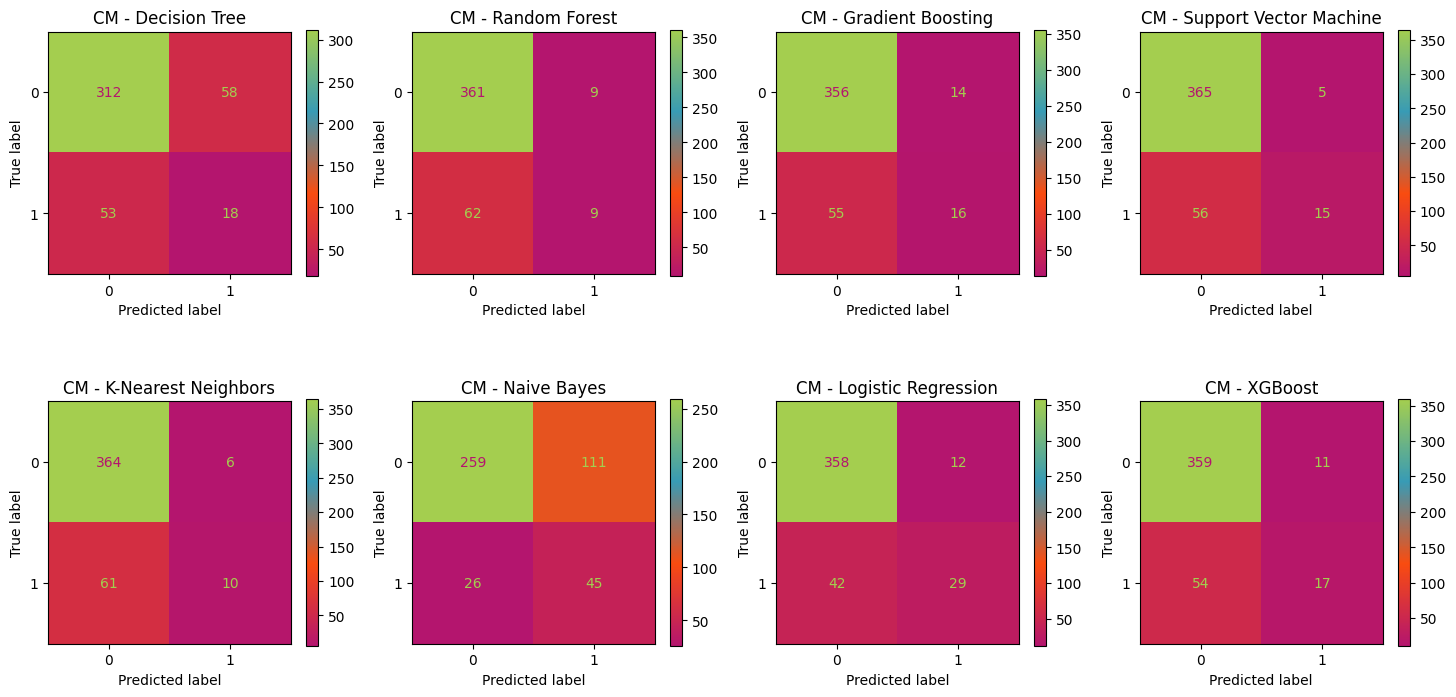

In [37]:
import matplotlib.colors as colors

# Define a custom color palette
custom_cmap = colors.LinearSegmentedColormap.from_list('custom', ['#B4156E', '#F94C10', '#389BB5','#A4CE4F'])

# Your code for plotting the confusion matrices
print('Plotting a Confusion Matrix')
print('*'*125)
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(hspace=0.5)

for (model_name, model), ax in zip(models.items(), axes.flatten()):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred, labels=np.unique(Y_test))
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
    
    # Use the custom colormap here
    cm_display.plot(cmap=custom_cmap, ax=ax)
    ax.set_title(f'CM - {model_name}')

plt.show()


# F1 Score

In [38]:
from sklearn.metrics import accuracy_score, classification_report, f1_score


for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average='weighted')
    
    report = classification_report(Y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.5f}')
    print(f'F1 Score: {f1:.5f}')
    print('Classification Report:\n', report)
    print('*' * 70)


Model: Decision Tree
Accuracy: 0.76190
F1 Score: 0.76514
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       370
           1       0.28      0.30      0.29        71

    accuracy                           0.76       441
   macro avg       0.57      0.57      0.57       441
weighted avg       0.77      0.76      0.77       441

**********************************************************************
Model: Random Forest
Accuracy: 0.83673
F1 Score: 0.79493
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.47      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.66      0.55      0.55       441
weighted avg       0.79      0.84      0.79       441

**********************************************************************
Model: Gradient Boosting
Accuracy: 0.85034

Plotting Confusion Matrices
*****************************************************************************************************************************


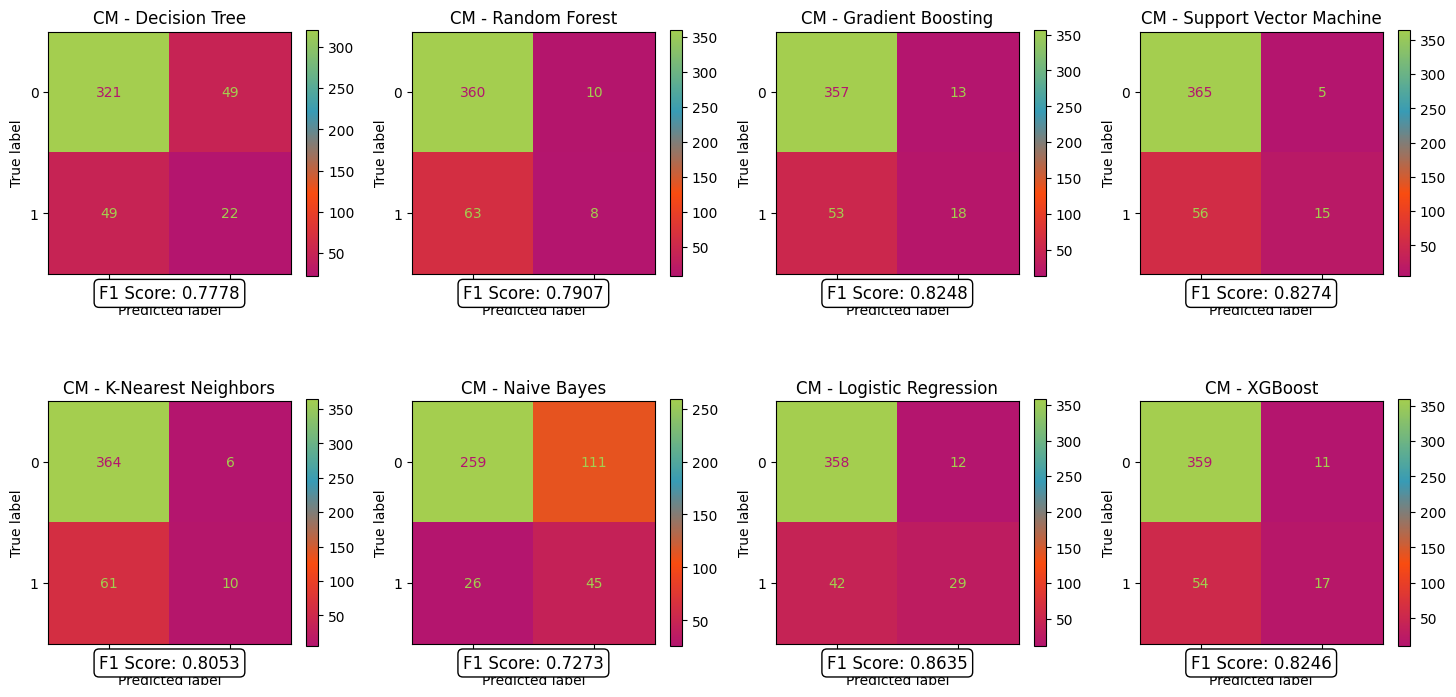

In [39]:
import matplotlib.colors as colors
from sklearn.metrics import f1_score

# Define a custom color palette
custom_cmap = colors.LinearSegmentedColormap.from_list('custom', ['#B4156E', '#F94C10', '#389BB5', '#A4CE4F'])

# Your code for plotting the confusion matrices
print('Plotting Confusion Matrices')
print('*' * 125)
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(hspace=0.5)

for (model_name, model), ax in zip(models.items(), axes.flatten()):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred, labels=np.unique(Y_test))

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))

    # Use the custom colormap here
    cm_display.plot(cmap=custom_cmap, ax=ax)
    ax.set_title(f'CM - {model_name}')
    
    f1 = f1_score(Y_test, y_pred, average='weighted')
    ax.text(0.5, -0.1, f'F1 Score: {f1:.4f}', size=12, ha="center",
            transform=ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.show()


# Conclusion

1. The analysis is based on the available dataset and may not capture all possible factors influencing employee attrition.
2. There could be other unmeasured variables that play a role in attrition.